In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris

import warnings
warnings.filterwarnings('ignore')

In [12]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
# Filtering the data
df = df[df['species'] != 0][['sepal width (cm)', 'petal length (cm)', 'species']]
df.head()

,sepal width (cm),petal length (cm),species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


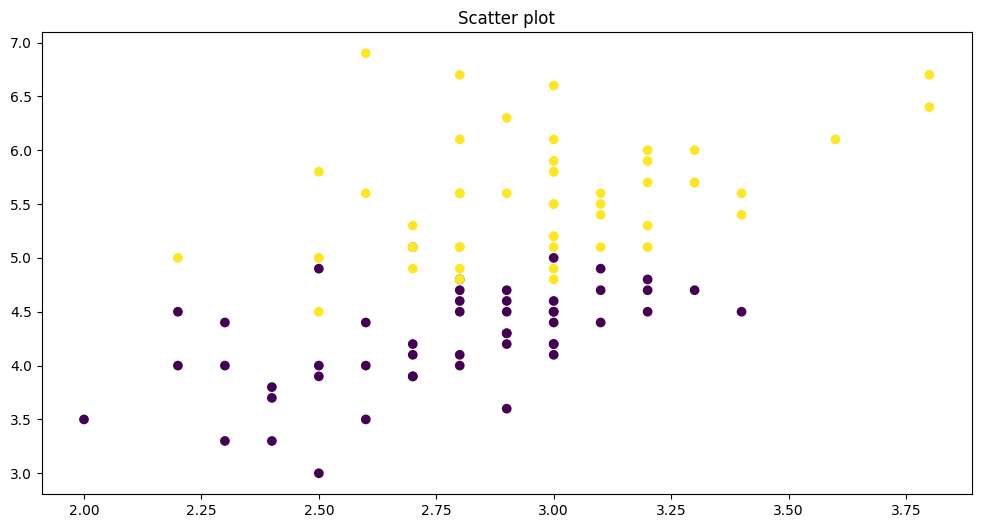

In [14]:
plt.figure(figsize=(12, 6))
plt.scatter(df['sepal width (cm)'], df['petal length (cm)'], c=df['species'])
plt.title("Scatter plot")
plt.show()

In [15]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1] 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Evaluation function
def evaluate(clf, X_train, y_train, X_test, y_test):

    # Fit the model
    clf.fit(X_train, y_train)

    # Create a figure with 1 row, 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Left plot: Decision Tree structure
    plot_tree(clf, ax=axes[0])
    axes[0].set_title("Decision Tree")

    # Right plot: Decision Boundary
    plot_decision_regions(X_train.values, y_train.values, clf=clf, legend=2, ax=axes[1])
    axes[1].set_title("Decision Boundary")

    plt.tight_layout()
    plt.show()

    # Evaluate accuracy on test set
    y_pred = clf.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))



=== Model 1 ===


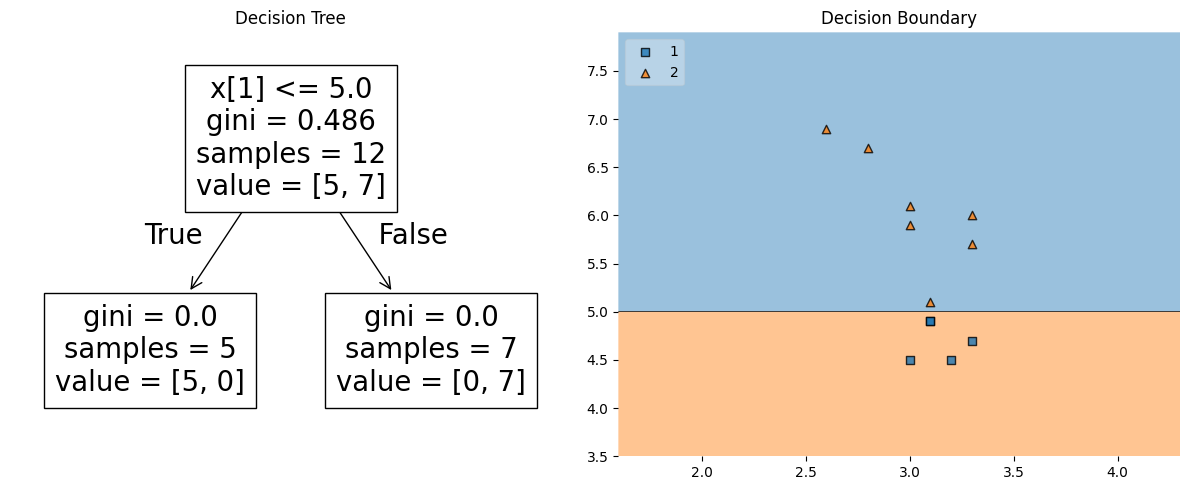

Accuracy: 0.8

=== Model 2 ===


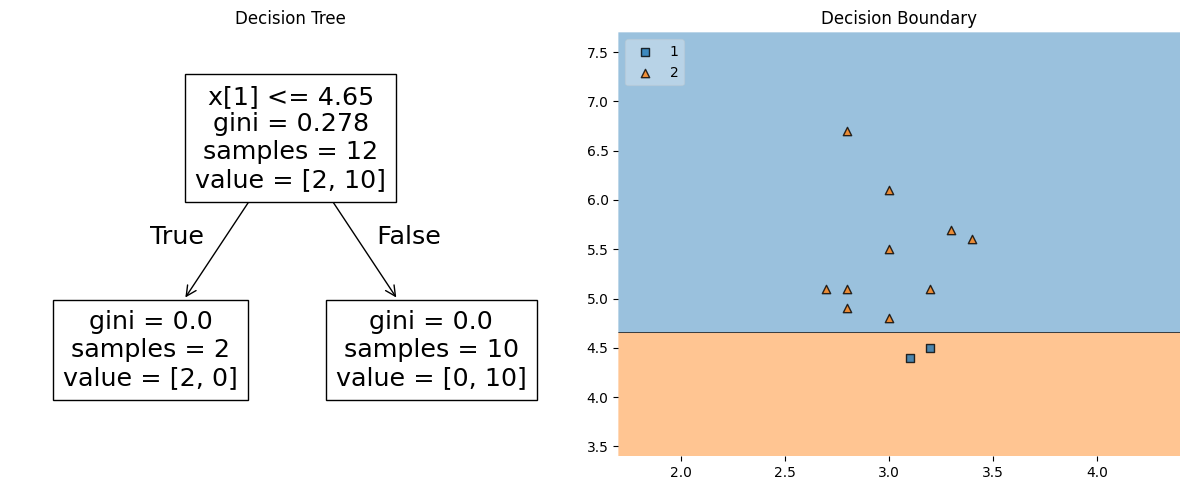

Accuracy: 0.85


In [18]:
for i in range(2):
    df_bag = X_train.join(y_train).sample(n=12, replace=True, random_state=i)
    X_bag = df_bag.iloc[:, 0:2]
    y_bag = df_bag.iloc[:, -1]

    dt = DecisionTreeClassifier(max_depth=None, random_state=i)
    print(f"\n=== Model {i+1} ===")
    evaluate(dt, X_bag, y_bag, X_test, y_test)